In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
from sklearn import linear_model
import numpy as np
#import pandas_profiling
%matplotlib inline
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
iris=pd.read_csv(r"E:\UPX\Machine Learning\Linear Regerssion\csv_files\iris.csv")
#pfrep=pandas_profiling.ProfileReport(iris)
#pfrep.to_file('./iris_report.html')
#file:///E:/UPX/Machine%20Learning/Linear%20Regerssion/iris_report.html
iris.describe()
iris.rename(columns={"Sepal.Length":"SLength","Sepal.Width":"SWidth","Petal.Length":"PLength","Petal.Width":"PWidth"},inplace=True)

In [4]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = iris[iris.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)
iris.drop(duplicateRowsDF.index,inplace=True)
iris.shape

Duplicate Rows except first occurrence based on all columns are :
     SLength  SWidth  PLength  PWidth    Species
142      5.8     2.7      5.1     1.9  virginica


(149, 5)

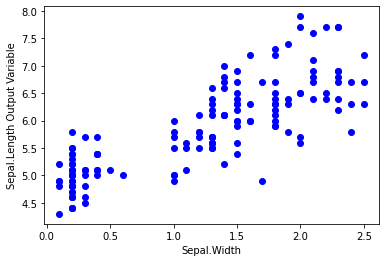

Index(['SLength', 'SWidth', 'PLength', 'PWidth', 'Species'], dtype='object')

In [5]:
plt.scatter(iris["PWidth"], iris["SLength"],  color='blue')
plt.xlabel("Sepal.Width")
plt.ylabel("Sepal.Length Output Variable")
plt.show()
iris.columns

In [6]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
regr = linear_model.LinearRegression()
feature_cols = ['SWidth']
X = iris[feature_cols]
#####Output Variable we are trying to Predict 
y=iris.SLength
print(linreg.fit(X, y))
#regr.fit (train_x, train_y)
# The coefficients
print ("intercept_==>",linreg.intercept_,"coef====>",linreg.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
intercept_==> 6.531859342920701 coef====> [-0.22493319]


In [131]:
print(linreg.intercept_ +  linreg.coef_*2.8)
linreg.predict(pd.DataFrame([2.8]))

[3.56834316 4.49796336 1.30783593 1.19008708 1.19008708 0.78802274
 0.78802274]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 7 is different from 1)

In [118]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print(reg)
print (linreg.intercept_)
print (linreg.coef_)
list(zip(feature_cols, linreg.coef_))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
2.188882886103214
[ 0.49266438  0.8246716  -0.31465963 -0.71342557 -1.00061439]


[('SWidth', 0.49266438279510505),
 ('PLength', 0.8246715992005146),
 ('PWidth', -0.31465962746336357),
 ('Species_versicolor', -0.7134255730234282),
 ('Species_virginica', -1.0006143901923406)]

In [95]:
#Holding all other features fixed, a 1 unit increase in SWidth is associated with a rental increase of 0.6462892435786255 SLength
#Holding all other features fixed, a 1 unit increase in PLength is associated with a rental increase of 0.7054942657590704 SLength.
#Holding all other features fixed, a 1 unit increase in PWidth is associated with a rental decrease of -0.5462558911776791 SLength.



In [119]:
from sklearn.model_selection import train_test_split

# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = iris[feature_cols]
    y = iris.SLength
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=112)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [120]:
from sklearn.model_selection import train_test_split

# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse_svm(feature_cols):
    X = iris[feature_cols]
    y = iris.SLength
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=112)
    svm = SVR(gamma='auto', C=1, kernel='linear',epsilon=0.0001)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [121]:
from sklearn import metrics
print(train_test_rmse(['SWidth', 'PLength', 'PWidth']))

0.29976841722727676


In [123]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=112)
# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)
# fill the array with the mean value of y_test
y_null.fill(y_test.mean())


In [124]:
np.sqrt(metrics.mean_squared_error(y_test, y_null))

0.7776171073548791

In [125]:
species_dummies = pd.get_dummies(iris.Species, prefix='Species')

In [126]:
species_dummies.drop("Species_setosa", axis=1, inplace=True)

In [127]:
iris = pd.concat([iris, species_dummies], axis=1)
iris.sample(n=5, random_state=1)

,SLength,SWidth,PLength,PWidth,Species,Species_versicolor,Species_virginica,Species_versicolor,Species_virginica
146,6.3,2.5,5.0,1.9,virginica,0,1,0,1
89,5.5,2.5,4.0,1.3,versicolor,1,0,1,0
54,6.5,2.8,4.6,1.5,versicolor,1,0,1,0
77,6.7,3.0,5.0,1.7,versicolor,1,0,1,0
84,5.4,3.0,4.5,1.5,versicolor,1,0,1,0


In [128]:
feature_cols = ['SWidth', 'PLength', 'PWidth','Species_versicolor','Species_virginica']
# include dummy variables for season in the model
X = iris[feature_cols]
y = iris.SLength
linreg = LinearRegression()
linreg.fit(X, y)
list(zip(feature_cols, linreg.coef_))

[('SWidth', 0.49266438279510477),
 ('PLength', 0.8246715992005131),
 ('PWidth', -0.3146596274633621),
 ('Species_versicolor', -0.3567127865117111),
 ('Species_virginica', -0.356712786511716)]

In [129]:
print (train_test_rmse(['SWidth', 'PLength', 'PWidth']))
print (train_test_rmse(['SWidth', 'PLength', 'PWidth','Species_versicolor','Species_virginica']))

0.29976841722727676
0.30047150547595364
